# Visualizing ADReSS Classification Challenge
Date: Mar 2, 2021
Update: Mar 5, 2021 Added wavelet, changed linear to dB scale
Update: Mar 12, 2021 Change wavelet scales from 20 to 10

ADReSS classification challenge contains Control and Dementia cookie jar picture description. The visualization is presented in spectrogram, Mel spectrogram and scalogram.

However, the recordings contains the interviewer and interviewee. To determine the subject has dementia or not, it will be better to be able to separate the 2 speakers. 

github: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change to challenge folder
import glob
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import os
os.chdir('/content/drive/MyDrive/2021 Interspeech Challenge/')

import sys
sys.path.insert(1, './')


In [ ]:
# Defining path for read/write
basepath = '/content/drive/MyDrive/2021 Interspeech Challenge/'
audiopath = '/content/drive/MyDrive/2021 Interspeech Challenge/ADReSSo21/diagnosis/train/audio/'
figurepath = '/content/drive/MyDrive/2021 Interspeech Challenge/Figures/'

cnfiles = glob.glob(audiopath+'cn/*.wav')
adfiles = glob.glob(audiopath+'ad/*.wav')



44100
(9679832,)
0.869873046875


Text(0, 0.5, 'AD')

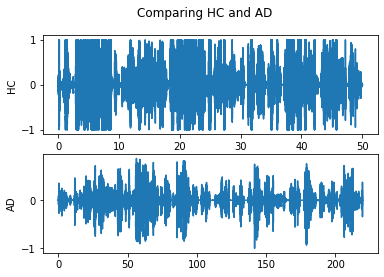

In [ ]:
# Using Wavelet to create scalogram
from scipy.io import wavfile
fs, csound = wavfile.read(cnfiles[0])
fs, asound = wavfile.read(adfiles[0])

csound = csound/32768
asound = asound/32768


print(fs)
print(asound.shape)
print(max(asound))


fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Comparing HC and AD')
t=[i/fs for i in range(len(csound))]
ax1.plot(t, csound)
ax1.set_ylabel('HC')
t=[i/fs for i in range(len(asound))]
ax2.plot(t, asound)
ax2.set_ylabel('AD')


# Spectrogram

In [ ]:
from scipy import signal


NFFT = 1024
cf, ct, cspectrogram = signal.spectrogram(csound,
                                      fs,
                                      window='hamming',
                                      nperseg=NFFT,
                                      noverlap=NFFT/2)
af, at, aspectrogram = signal.spectrogram(asound,
                                      fs,
                                      window='hamming',
                                      nperseg=NFFT,
                                      noverlap=NFFT/2)

cspectrogram = librosa.amplitude_to_db(cspectrogram)
aspectrogram = librosa.amplitude_to_db(aspectrogram)


Time:  4311
Freq:  513
(513, 4311)


Text(0, 0.5, 'AD')

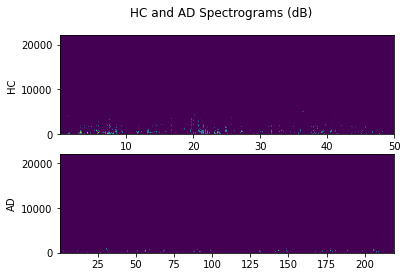

In [ ]:
print('Time: ',len(ct))
print('Freq: ',len(cf))
print(cspectrogram.shape)

#topfreq = 50
#plt.pcolormesh(t, f[0:topfreq], spectrogram[0:topfreq,:])
#plt.pcolormesh(t, f, spectrogram)
#plt.ylabel('Frequency [Hz]')
#plt.xlabel('Time [sec]')
#plt.show()


fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('HC and AD Spectrograms (dB)')
ax1.pcolormesh(ct, cf, cspectrogram)
ax1.set_ylabel('HC')
ax2.pcolormesh(at, af, aspectrogram)
ax2.set_ylabel('AD')


# Mel Spectrogram



In [ ]:
# Mel Filterbank and Mel Spec
import numpy as np
import librosa


# Creating Mel filters
frange = fs/2   #Frequency range
n_mels = 128     #Number of mel filters


# Define Mel Spec parameters
framesize = 0.02 #Setting frame size to 2 msec
n_fft=int(np.floor(framesize*fs))
overlap = 2
hop_length = int(n_fft/overlap)
win_length = n_fft
center = True
stft_config = dict(n_fft=n_fft, 
                   hop_length=hop_length, 
                   win_length=n_fft, 
                   window='hamming')
#lenSound = int(np.floor(len(sound)/fs)*fs)
#fDim = int(np.floor(n_fft/2) + 1)
#tDim = int(lenSound/(fDim-1))+ 1

# Define the MFCC filter bank
melfb = np.asarray(librosa.filters.mel(frange, n_fft, n_mels))


# Creating Mel Spectrogram
def createMelSpecdB(sound, melfb):
  STFT = librosa.amplitude_to_db(librosa.stft(sound, **stft_config))  
  
  mag = np.asarray(np.abs(STFT))
  tmppsd = np.multiply(mag,mag)
  
  melspec = melfb.dot(tmppsd)
  
  return melspec

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


(128, 5007)


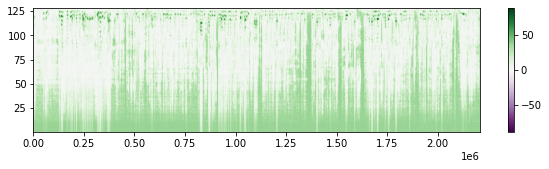

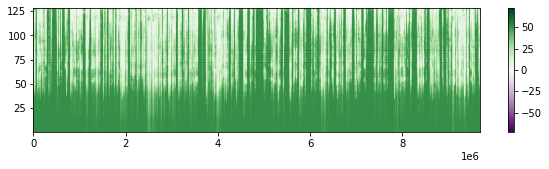

In [ ]:
cmelspec = createMelSpecdB(csound, melfb)
amelspec = createMelSpecdB(asound, melfb)
print(cmelspec.shape)

nrow,ncol = cmelspec.shape
f=[i*fs/(2*nrow) for i in range(nrow)]
#t=[i*framesize/2 for i in range(ncol)]
##plt.pcolormesh(melspec[0:topfreq,:])
#plt.pcolormesh(t,f,melspec)
#plt.ylabel('Frequency [Hz]')
#plt.xlabel('Time [sec]')
#plt.show()

#fig, (ax1, ax2) = plt.subplots(2, 1)
#fig.suptitle('HC and AD Mel Spectrogram (dB)')
#nrow,ncol = cmelspec.shape
#f=[i*fs/(2*nrow) for i in range(nrow)]
#t=[i*framesize/2 for i in range(ncol)]
#ax1.pcolormesh(t, f, cmelspec)
#ax1.set_ylabel('HC')
#nrow,ncol = amelspec.shape
#f=[i*fs/(2*nrow) for i in range(nrow)]
#t=[i*framesize/2 for i in range(ncol)]
#ax2.pcolormesh(t, f, amelspec)
#ax2.set_ylabel('AD')

#plt.savefig("melspec.png") 
#plt.savefig("melspec.pdf") 



plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.imshow(cmelspec, extent=[0, int(len(csound)), 1, len(f)],cmap='PRGn', aspect='auto', 
           vmax=abs(cmelspec).max(), vmin=-abs(cmelspec).max())
plt.colorbar()

plt.figure(figsize=(10,5))
plt.subplot(2,1,2)
plt.imshow(amelspec, extent=[0, int(len(asound)), 1, len(f)],cmap='PRGn', aspect='auto', 
           vmax=abs(amelspec).max(), vmin=-abs(amelspec).max())
plt.colorbar()
plt.show()


# Wavelet

ContinuousWavelet morl
  Family name:    Morlet wavelet
  Short name:     morl
  Symmetry:       symmetric
  DWT:            False
  CWT:            True
  Complex CWT:    False


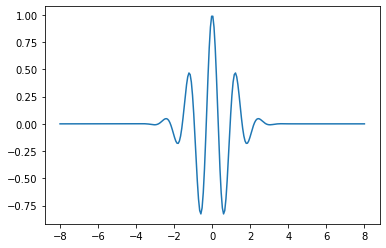

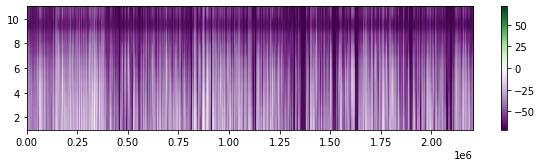

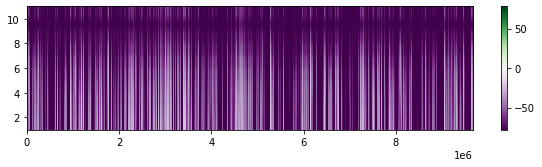

In [ ]:

#!pip install PyWavelets
import pywt #wavelet library

#cA, cD = pywt.dwt(csound, 'db1')
continuous_wavelet = pywt.ContinuousWavelet('morl')
print(continuous_wavelet)
(phi, psi) = continuous_wavelet.wavefun()
plt.plot(psi,phi)
plt.show()

max_scale = 10 # Tried 20, need to try a smaller number in the range of [5,10]
scales = np.arange(1, max_scale + 1)

# HC
cwtmatr, freqs = pywt.cwt(csound, scales, continuous_wavelet, fs)
cwtmatr = librosa.amplitude_to_db(cwtmatr)
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.imshow(cwtmatr, extent=[0, int(len(csound)), 1, max_scale + 1],cmap='PRGn', aspect='auto', 
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.colorbar()
plt.show()

# AD
cwtmatr, freqs = pywt.cwt(asound, scales, continuous_wavelet, fs)
cwtmatr = librosa.amplitude_to_db(cwtmatr)
plt.figure(figsize=(10,5))
plt.subplot(2,1,2)
plt.imshow(cwtmatr, extent=[0, int(len(asound)), 1, max_scale + 1],cmap='PRGn', aspect='auto', 
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.colorbar()
plt.show()
